<a href="https://colab.research.google.com/github/gogowonji/Machine-Learning-with-Python/blob/main/ch2_3_9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache directory
fc-cache: succeeded


In [3]:
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic')

In [4]:
from IPython.display import display
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

!pip install mglearn
import mglearn # github clone

     |████████████████████████████████| 540 kB 16.7 MB/s 
  Created wheel for mglearn: filename=mglearn-0.1.9-py2.py3-none-any.whl size=582639 sha256=b140a2909a164a276c85af5e9d06e23f26742332c75c3fcb1928abece86fcb80
  Stored in directory: /root/.cache/pip/wheels/f1/17/e1/1720d6dcd70187b6b6c3750cb3508798f2b1d57c9d3214b08b
Successfully built mglearn


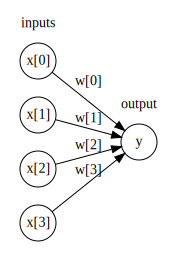

In [5]:
display(mglearn.plots.plot_logistic_regression_graph())

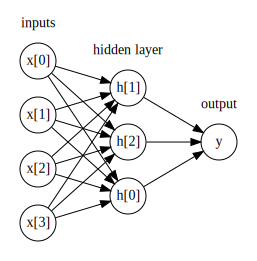

In [8]:
display(mglearn.plots.plot_single_hidden_layer_graph())

Text(0, 0.5, 'relu(x), tanh(x)')

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


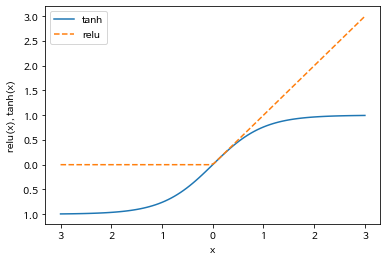

In [9]:
line = np.linspace(-3,3,100)
plt.plot(line, np.tanh(line), label="tanh")
plt.plot(line, np.maximum(line, 0), linestyle='--', label="relu")
plt.legend(loc="best")
plt.xlabel("x")
plt.ylabel("relu(x), tanh(x)")

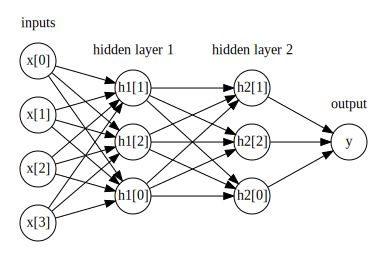

In [10]:
mglearn.plots.plot_two_hidden_layer_graph()

Text(0, 0.5, '특성 1')

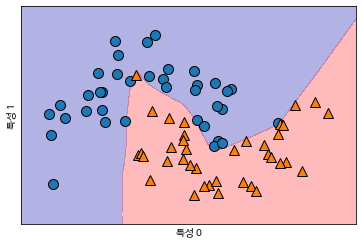

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_moons

# moon 데이터셋 사용
X,y = make_moons(n_samples=100, noise=0.25, random_state=3)

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

# 기본 함수 : ReLU
# 은닉 유닛 기본 값 : 100 
mlp = MLPClassifier(solver="lbfgs", random_state=0).fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:,0], X_train[:,1], y_train)

plt.xlabel("특성 0")
plt.ylabel("특성 1")

Text(0, 0.5, '특성 1')

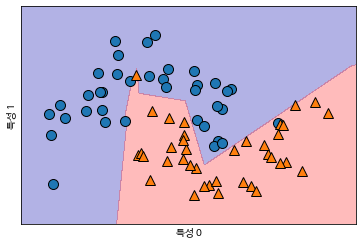

In [15]:
# 기본 함수 : ReLU
# 은닉 유닛 : 10개
mlp = MLPClassifier(solver="lbfgs", random_state=0, hidden_layer_sizes=[10],max_iter=1000)
mlp.fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:,0], X_train[:,1], y_train)

plt.xlabel("특성 0")
plt.ylabel("특성 1")

Text(0, 0.5, '특성 1')

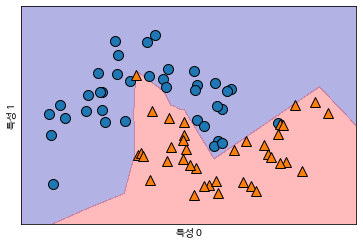

In [16]:
# 기본 함수 : ReLU
# 은닉 유닛 : 10개, 10개
# 은닉 층 개수 : 2개
mlp = MLPClassifier(solver="lbfgs", random_state=0, hidden_layer_sizes=[10,10])
mlp.fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:,0], X_train[:,1], y_train)

plt.xlabel("특성 0")
plt.ylabel("특성 1")

Text(0, 0.5, '특성 1')

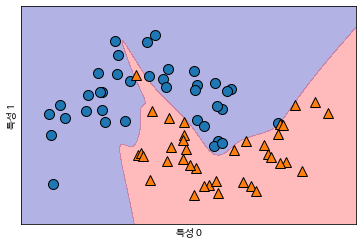

In [20]:
# 기본 함수 : tanh
# 은닉 유닛 : 10개, 10개
# 은닉 층 개수 : 2개
mlp = MLPClassifier(solver="lbfgs", activation='tanh', random_state=0, hidden_layer_sizes=[10,10],max_iter=1000)
mlp.fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:,0], X_train[:,1], y_train)

plt.xlabel("특성 0")
plt.ylabel("특성 1")

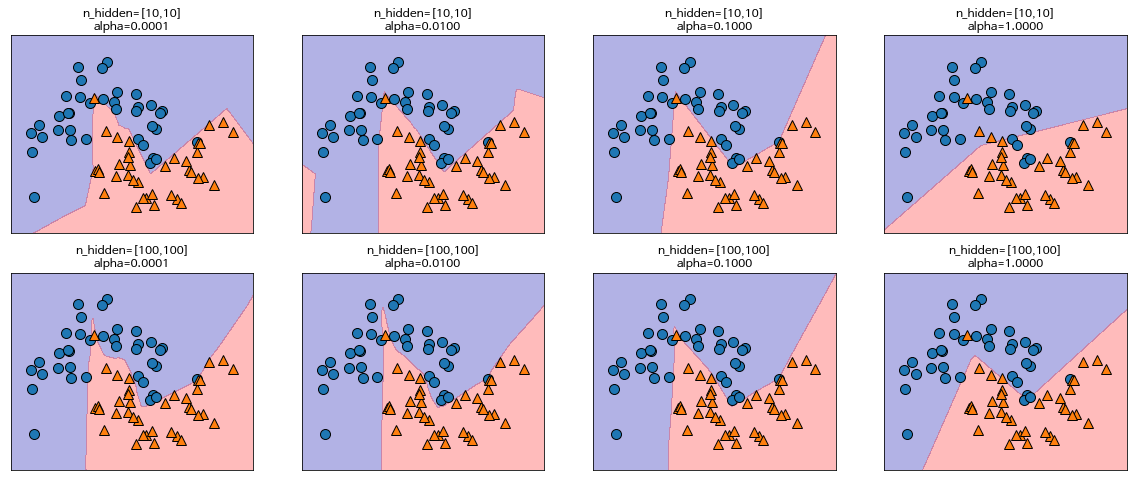

In [18]:
# alpha (복잡도 제어 - L2 페널티)
# 기본 함수 : ReLU
# 은닉 유닛 : 10개, 10개 / 100개, 100개
# 은닉 층 개수 : 2개
# alpha : 0.0001 / 0.01 / 0.1 / 1
fig, axes = plt.subplots(2, 4, figsize=(20,8))
for axx, n_hidden_nodes in zip(axes, [10,100]):
  for ax, alpha in zip(axx, [0.0001, 0.01, 0.1, 1]):
    mlp = MLPClassifier(solver='lbfgs', random_state = 0, max_iter = 1000,
                        hidden_layer_sizes=[n_hidden_nodes, n_hidden_nodes],
                        alpha=alpha)
    mlp.fit(X_train, y_train)
    mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3, ax=ax)
    mglearn.discrete_scatter(X_train[:,0], X_train[:,1], y_train, ax=ax)
    ax.set_title("n_hidden=[{},{}]\nalpha={:.4f}".format(n_hidden_nodes, n_hidden_nodes, alpha))

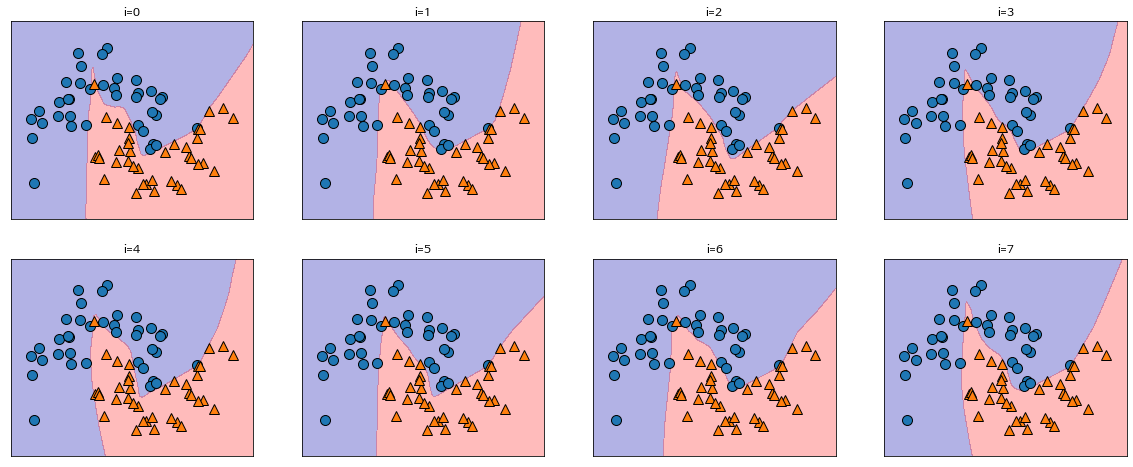

In [21]:
# 초기화 = 가중치 무작위 설정 (random_state)
# 기본 함수 : ReLU
# 은닉 유닛 : 100개, 100개
# 은닉 층 개수 : 2개
fig, axes = plt.subplots(2, 4, figsize=(20,8))
for i, ax in enumerate(axes.ravel()):
    mlp = MLPClassifier(solver='lbfgs', random_state = i,
                        hidden_layer_sizes=[100, 100])
    mlp.fit(X_train, y_train)
    mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3, ax=ax)
    mglearn.discrete_scatter(X_train[:,0], X_train[:,1], y_train, ax=ax)
    ax.set_title("i={}".format(i))

In [26]:
# 유방암 데이터셋 사용
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, random_state=0)

mlp = MLPClassifier(random_state=42)
mlp.fit(X_train, y_train)

print("훈련 세트 정확도: {:.2f}".format(mlp.score(X_train, y_train)))
print("테스트 세트 정확도: {:.2f}".format(mlp.score(X_test, y_test)))

훈련 세트 정확도: 0.94
테스트 세트 정확도: 0.92


In [27]:
# 데이터 전처리

# 훈련 세트 각 특성의 평균 계산
mean_on_train = X_train.mean(axis=0)
# 훈련 세트 각 특성의 표준 편차 계산
std_on_train = X_train.std(axis=0)

# 변환
X_train_scaled = (X_train - mean_on_train) / std_on_train
X_test_scaled = (X_test - mean_on_train) / std_on_train

mlp = MLPClassifier(random_state=0)
mlp.fit(X_train_scaled, y_train)

print("훈련 세트 정확도: {:.3f}".format(mlp.score(X_train_scaled, y_train)))
print("테스트 세트 정확도: {:.3f}".format(mlp.score(X_test_scaled, y_test)))

훈련 세트 정확도: 0.991
테스트 세트 정확도: 0.965


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


In [28]:
# 반복 횟수 증가 max_iter
mlp = MLPClassifier(max_iter=1000, random_state=0)
mlp.fit(X_train_scaled, y_train)

print("훈련 세트 정확도: {:.3f}".format(mlp.score(X_train_scaled, y_train)))
print("테스트 세트 정확도: {:.3f}".format(mlp.score(X_test_scaled, y_test)))

훈련 세트 정확도: 1.000
테스트 세트 정확도: 0.972


In [29]:
# alpha 증가 - 가중치 강하게 규제 - 복잡도 낮추기
mlp = MLPClassifier(max_iter=1000, alpha=1, random_state=0)
mlp.fit(X_train_scaled, y_train)

print("훈련 세트 정확도: {:.3f}".format(mlp.score(X_train_scaled, y_train)))
print("테스트 세트 정확도: {:.3f}".format(mlp.score(X_test_scaled, y_test)))

훈련 세트 정확도: 0.988
훈련 세트 정확도: 0.972


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


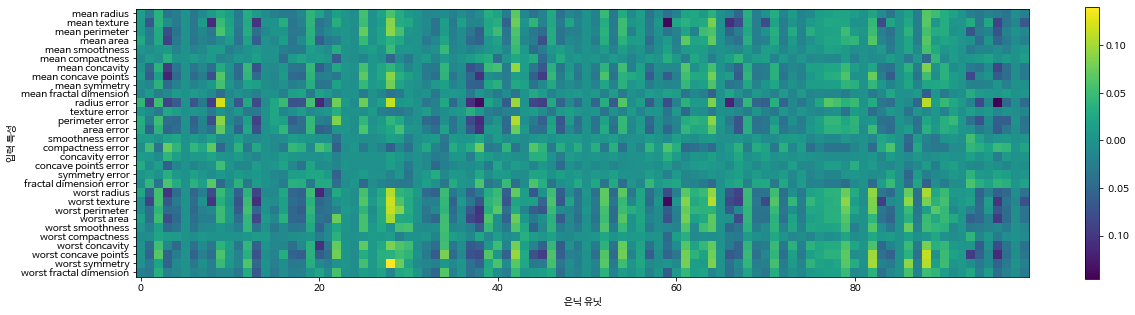

In [30]:
# 입력 ~ 은닉층 사이 학습된 가중치 시각화
plt.figure(figsize=(20, 5))
plt.imshow(mlp.coefs_[0], interpolation='none', cmap='viridis')
plt.yticks(range(30), cancer.feature_names)
plt.xlabel("은닉 유닛")
plt.ylabel("입력 특성")
plt.colorbar()